With this notebook we want to test how many and which of the important features have been exploited by each isolation tree in a given isolation forest.

In [1]:
import os
import numpy as np
import pickle as pkl 
# import time
import matplotlib.pyplot as plt 
%matplotlib inline
# from sklearn.ensemble import IsolationForest
# from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score
from sklearn.utils import shuffle
# import shap
# import diffi.interpretability_module as interp
from diffi.utils import *

/Users/sebastianosanson/Documents/Master Thesis/Master-Thesis/mt_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load dataset

In [2]:
with open(os.path.join(os.getcwd(), 'dataset', 'syn_train.pkl'), 'rb') as f:
    data_tr = pkl.load(f)
with open(os.path.join(os.getcwd(), 'dataset', 'syn_test.pkl'), 'rb') as f:
    data_te = pkl.load(f)

X_tr = data_tr.iloc[:, :-1]
y_tr = data_tr.iloc[:, -1]

X_tr, y_tr = shuffle(X_tr, y_tr, random_state=0)

X_te = data_te.iloc[:, :-1]
y_te = data_te.iloc[:, -1]


In [3]:
print('Training set size: ', X_tr.shape)
print('Trainin label size: ', y_tr.shape)

print('Test set size: ', X_te.shape)
print('Test label size: ', y_te.shape)

Training set size:  (1000, 20)
Trainin label size:  (1000,)
Test set size:  (100, 20)
Test label size:  (100,)


## Train the Isolation Forest

In [4]:
sorted_idx, avg_f1, fi_means, fi_std, features_per_forest, fi_diffi_all, iforests = diffi_ranks(X=X_tr.to_numpy(), y=y_tr.to_numpy(), n_trees=100, 
                                                                        max_samples=256, n_iter=1, contamination=0.1)
print('Average F1 score: {:.4f}'.format(avg_f1))
# print('Ranked features: ', sorted_idx)
# print('Feature importance means: ', fi_means)
# print('Feature importance std: ', fi_std)        

Average F1 score: 0.4300


In [5]:
sorted_idx, avg_f1, fi_means, fi_std, features_per_forest, fi_diffi_all, iforests, fi_outliers_ib_per_tree, fi_inliers_ib_per_tree = diffi_ranks_tmp(X=X_tr.to_numpy(), y=y_tr.to_numpy(), n_trees=100, 
                                                                        max_samples=256, n_iter=1, contamination=0.1)
print('Average F1 score: {:.4f}'.format(avg_f1))
# print('Ranked features: ', sorted_idx)
# print('Feature importance means: ', fi_means)
# print('Feature importance std: ', fi_std)    

cfi_outliers_ib: [ 4.91218821  0.          0.          1.53412698  0.82142857  8.13006757
  4.57670068  2.86865079  1.66666667  8.10752866  0.14285714 11.40811966
  6.60808824  1.73321429  0.375       1.3125      1.92619048  1.85119048
  0.89285714  3.20595238]
counter_outliers_ib: [46  0  0 13 13 84 44 29 14 84  2 84 65 14  6 13 14 21  8 28]
cfi_outliers_ib: [ 6.95087868  2.88492063  1.825       3.49990079 14.50878571 19.37556153
  6.51420068  3.63650794  7.21169355  9.54205247  0.14285714 12.82002442
  7.10808824  2.0427381   5.0828373   2.9203869   4.4484127  16.26675926
  2.73988095  8.84461076]
counter_outliers_ib: [ 66  25  12  30 154 189  61  36  86 108   2  93  69  18  55  29  38 138
  28  98]
cfi_outliers_ib: [ 8.24254535  6.4         1.825       8.68069084 27.81796969 22.65267794
  9.99931973  6.16344246  7.47359831 14.81776675  0.9672619  16.09469974
  9.33427871  5.33837302  6.44712302  4.35372024  8.55823413 25.49132066
  8.73630952  9.09461076]
counter_outliers_ib: [ 81  

/Users/sebastianosanson/Documents/Master Thesis/Master-Thesis/diffi/interpretability_module.py:237: RuntimeWarning: invalid value encountered in divide
  partial_fi_outliers_ib = np.where(counter_outliers_ib > 0, cfi_outliers_ib / counter_outliers_ib, 0)


cfi_outliers_ib: [213.89007544 240.25450742 203.47371181 219.4717942  228.49951415
 234.63389369 319.41452423 231.51549209 218.94522207 221.34849968
 253.53171166 297.84885102 304.34950408 247.3731421  300.16312561
 247.8153306  239.9436348  273.68701492 229.8077349  198.21101676]
counter_outliers_ib: [1925 2080 2200 2270 2231 2366 3170 2309 2238 2225 2351 3015 3136 2434
 3152 2476 2452 2727 2271 1943]
cfi_outliers_ib: [221.68053111 246.90629314 207.54781895 223.68290531 228.93284748
 237.10175083 327.30106417 236.04828429 227.8671483  222.52349968
 254.03171166 301.30420816 316.74056228 248.18266591 300.72562561
 252.06036036 245.42934909 279.36278522 232.28789363 202.31391855]
counter_outliers_ib: [2007 2134 2237 2312 2234 2389 3268 2355 2363 2239 2355 3050 3254 2441
 3158 2517 2508 2794 2300 1991]
cfi_outliers_ib: [232.10106682 247.20788044 211.46798702 224.54228031 230.60844272
 239.4809175  327.59273084 236.38161763 230.00941021 224.11576158
 261.25766829 303.66988276 317.05008609

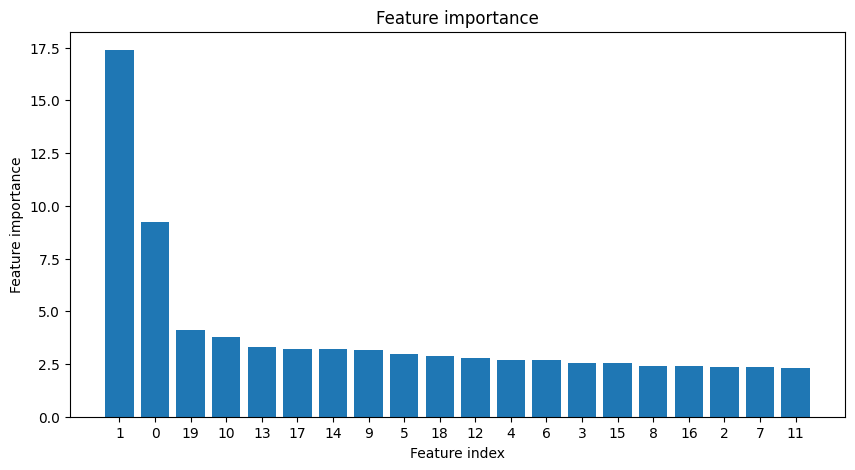

In [6]:
# plot the features importance
plt.figure(figsize=(10, 5))
plt.bar(range(len(sorted_idx)), fi_means[sorted_idx], yerr=fi_std[sorted_idx])
plt.xticks(range(len(sorted_idx)), sorted_idx)
plt.xlabel('Feature index')
plt.ylabel('Feature importance')
plt.title('Feature importance')
plt.show()

Notice that the two most important features are the meaningful ones, while the other are the noise ones (in according to synthetic dataset).

In [7]:
two_most_important_features = sorted_idx[:2]
print('Two most important features:', two_most_important_features)

Two most important features: [1 0]


In [8]:
features_per_forest = np.array(features_per_forest, dtype=object)
# print(features_per_forest.shape)  
print('Number of forest/s: ', len(features_per_forest))
print('Number of tree/s: ', [len(features_per_forest[i]) for i in range(len(features_per_forest))])

# for i, forest in enumerate(features_per_forest):
#     print('Forest {}:'.format(i))
#     for j, tree in enumerate(forest):
#         print('Number of features in tree {}: {}'.format(j, len(tree)))
#         print('Features in tree {} in forest {}: {}'.format(j, i, tree))

Number of forest/s:  1
Number of tree/s:  [100]


## Global features usage in Isolation Forest

We compute the usage of each feature over the Isolation Forest

In [9]:
usage_per_forest = np.zeros((len(features_per_forest), X_tr.shape[1]), 
                            dtype=object)    # shape: (number of forests, number of features)
usage_per_tree = np.zeros((len(features_per_forest), len(features_per_forest[0]), X_tr.shape[1]), 
                          dtype=object)  # shape: (number of forests, number of trees, number of features)


for i in range(X_tr.shape[1]):                                                      # for each feature                                     
    for j, forest in enumerate(features_per_forest):                                # for each forest
        for k, tree in enumerate(forest):                                           # for each tree
            # count the number of times feature i is used in tree k in forest j
            usage_per_tree[j, k, i] = np.sum([1 for feature in tree if feature == i])   
        # count the number of times feature i is used in forest j
        usage_per_forest[j, i] = np.sum(usage_per_tree[j, :, i])                          

print(np.array(usage_per_tree, dtype=object).shape)
print(np.array(usage_per_forest, dtype=object).shape)

(1, 100, 20)
(1, 20)


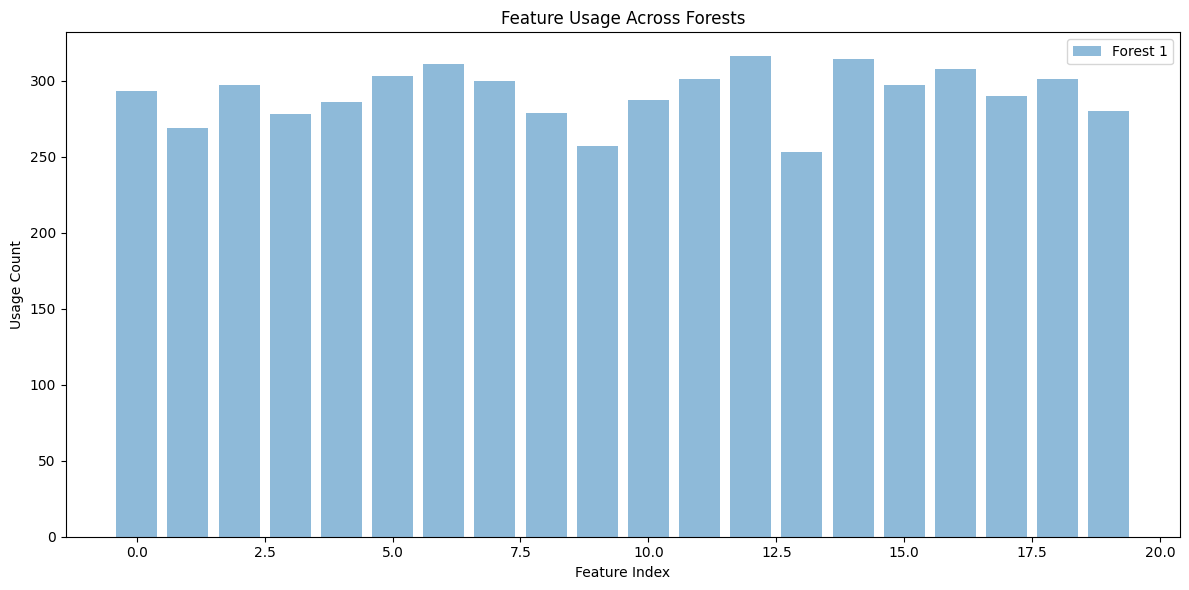

In [10]:
plt.figure(figsize=(12, 6))
for i in range(usage_per_forest.shape[0]):
    plt.bar(range(usage_per_forest.shape[1]), usage_per_forest[i], alpha=0.5, label=f'Forest {i+1}')
plt.xlabel('Feature Index')
plt.ylabel('Usage Count')
plt.title('Feature Usage Across Forests')
plt.legend()
plt.tight_layout()
plt.show()

## `two_most_important_features` usage 

Counting how many times the `two_most_important_features`are used in each Isolation Tree

In [11]:
num_forests = len(features_per_forest)
num_trees = len(features_per_forest[0])

two_most_important_features_usage = np.zeros((len(two_most_important_features), 
                                              num_forests, num_trees))    # shape: (number of meaningful features, number of forests, number of trees)
# print(two_most_important_features_usage.shape)

for i in range(len(two_most_important_features)):
    for j, forest in enumerate(features_per_forest):
        for k, tree in enumerate(forest):
            two_most_important_features_usage[i, j, k] = usage_per_tree[j, k, i] / len(tree)  

print('Two most important features usage:', two_most_important_features_usage)

Two most important features usage: [[[0.02857143 0.03007519 0.02721088 0.01123596 0.03870968 0.
   0.03508772 0.04316547 0.02521008 0.         0.00826446 0.01438849
   0.00917431 0.01886792 0.04511278 0.01481481 0.03076923 0.00613497
   0.03546099 0.         0.00840336 0.05035971 0.06060606 0.01574803
   0.01769912 0.06766917 0.02013423 0.02857143 0.01863354 0.05405405
   0.05426357 0.02105263 0.         0.01204819 0.01265823 0.
   0.01694915 0.02597403 0.03738318 0.         0.04       0.03448276
   0.04273504 0.0173913  0.02484472 0.01960784 0.         0.00740741
   0.01459854 0.04137931 0.02362205 0.02752294 0.02040816 0.01204819
   0.02298851 0.02197802 0.01438849 0.03184713 0.01834862 0.04242424
   0.00826446 0.04065041 0.         0.04026846 0.07070707 0.01869159
   0.00787402 0.03589744 0.00564972 0.0130719  0.016      0.04458599
   0.01098901 0.         0.02362205 0.03296703 0.01459854 0.04761905
   0.03007519 0.0173913  0.02247191 0.01818182 0.02923977 0.02247191
   0.01910828 0

Now we are going to normalize the results to the range [0, 1]

In [12]:
two_most_important_features_usage_probabilities = np.zeros((len(two_most_important_features), 
                                                            num_forests, num_trees))    # shape: (number of meaningful features, number of forests, number of trees)

for i, feature in enumerate(two_most_important_features_usage):
    for j, forest in enumerate(feature):
        max = np.max(forest)
        for k, tree in enumerate(forest):
            two_most_important_features_usage_probabilities[i, j, k] = two_most_important_features_usage[i, j, k] / max

print('Two most important features usage probabilities:', two_most_important_features_usage_probabilities)

Two most important features usage probabilities: [[[0.40408163 0.42534909 0.38483965 0.15890851 0.54746544 0.
   0.4962406  0.61048304 0.35654262 0.         0.11688312 0.20349435
   0.12975098 0.26684636 0.63802363 0.20952381 0.43516484 0.08676599
   0.50151976 0.         0.11884754 0.71223022 0.85714286 0.22272216
   0.25031606 0.95703545 0.28475551 0.40408163 0.2635315  0.76447876
   0.76744186 0.29774436 0.         0.17039587 0.17902351 0.
   0.23970944 0.36734694 0.52870494 0.         0.56571429 0.48768473
   0.6043956  0.24596273 0.35137533 0.27731092 0.         0.1047619
   0.20646507 0.58522167 0.33408324 0.38925295 0.28862974 0.17039587
   0.32512315 0.31083203 0.20349435 0.45040946 0.25950197 0.6
   0.11688312 0.57491289 0.         0.56951103 1.         0.26435247
   0.11136108 0.50769231 0.07990315 0.18487395 0.22628571 0.63057325
   0.15541601 0.         0.33408324 0.46624804 0.20646507 0.67346939
   0.42534909 0.24596273 0.31781701 0.25714286 0.41353383 0.31781701
   0.2702

Plotting the usage probabilities of `two_most_important_features` across isolation trees

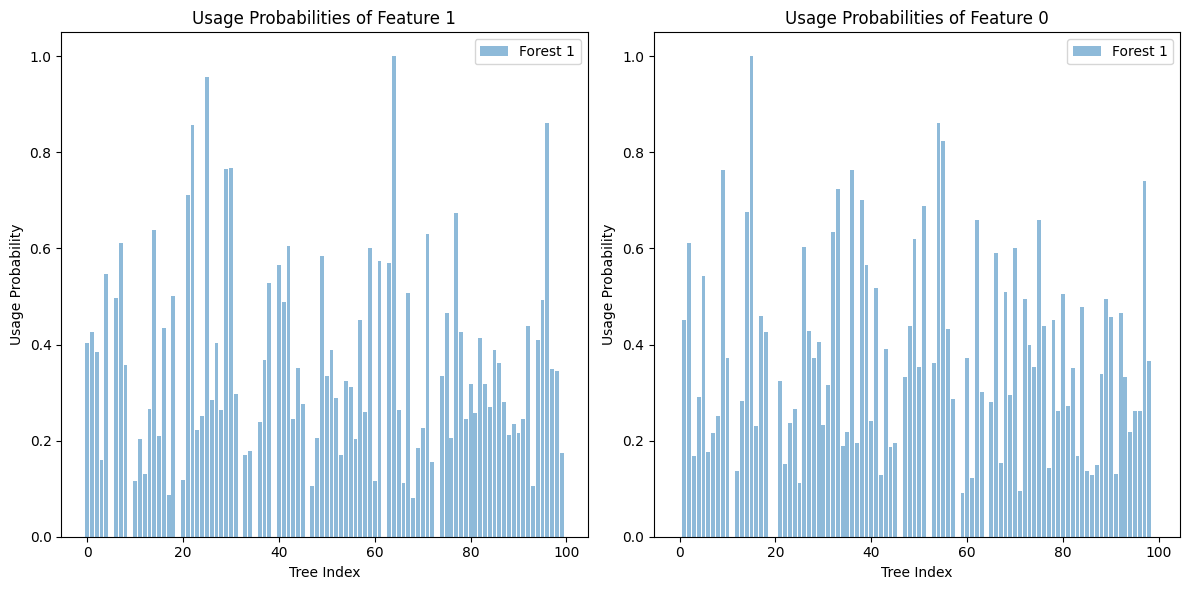

In [13]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(two_most_important_features):
    plt.subplot(1, 2, i+1)
    for j in range(num_forests):
        plt.bar(range(num_trees), two_most_important_features_usage_probabilities[i, j, :], alpha=0.5, label=f'Forest {j+1}')
    plt.xlabel('Tree Index')
    plt.ylabel('Usage Probability')
    plt.title(f'Usage Probabilities of Feature {feature}')
    plt.legend()
plt.tight_layout()
plt.show()

## Average usage

Calculating the average of the `two_most_important_features_usage_probabilities` for each `two_most_important_features`

In [14]:
average_usage_probabilities = np.zeros((len(two_most_important_features), num_forests))    # shape: (number of meaningful features, number of forests)
for i in range(len(two_most_important_features)):
    for j in range(num_forests):
        average_usage_probabilities[i, j] = np.mean(two_most_important_features_usage_probabilities[i, j, :])
print('Average usage probabilities:', average_usage_probabilities)
# np.mean(two_most_important_features_usage_probabilities, axis=1)
# for i, feature in enumerate(two_most_important_features):
#     print(f"Average usage probability for Feature {feature}: {average_usage_probabilities[i]:.4f}")

Average usage probabilities: [[0.33582968]
 [0.34879514]]


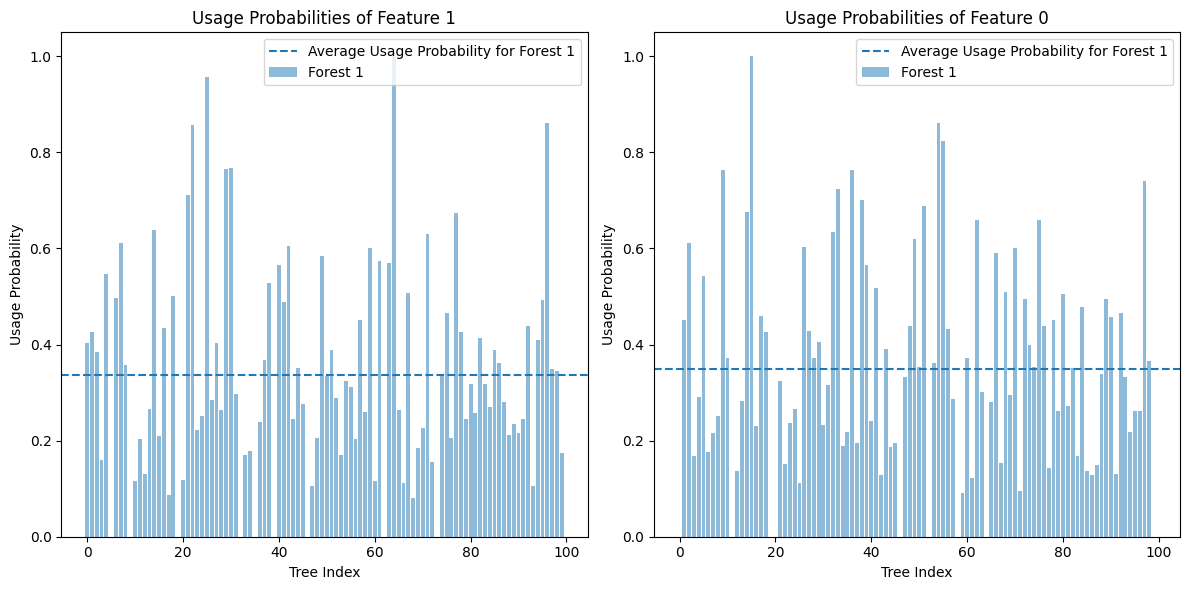

In [15]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(two_most_important_features):
    plt.subplot(1, 2, i+1)
    for j in range(num_forests):
        plt.bar(range(num_trees), two_most_important_features_usage_probabilities[i, j, :], alpha=0.5, label=f'Forest {j+1}')
        plt.axhline(y=average_usage_probabilities[i, j], color=f'C{j}', linestyle='--', label=f'Average Usage Probability for Forest {j+1}')
    plt.xlabel('Tree Index')
    plt.ylabel('Usage Probability')
    plt.title(f'Usage Probabilities of Feature {feature}')
    plt.legend()
plt.tight_layout()
plt.show()

## Inference on new iForests

Now we are going to select the indexes of the trees to be removed from the original iForests

In [16]:
# save indexes of the trees to be removed
tree_idx = np.zeros((len(two_most_important_features), num_forests), dtype=object)  # shape: (number of meaningful features, number of forests)
print(tree_idx.shape)

for i, feature in enumerate(two_most_important_features_usage_probabilities):
    for j, forest in enumerate(feature):
        tree_idx[i, j] = np.where(forest < 0.2)[0]  # get the indexes of the trees where the usage probability is less than 0.2
        print(f"Feature {two_most_important_features[i]} in Forest {j+1} has trees with usage probability < 0.2: {tree_idx[i, j]}")


(2, 1)
Feature 1 in Forest 1 has trees with usage probability < 0.2: [ 3  5  9 10 12 17 19 20 32 33 34 35 39 46 47 53 60 62 66 68 69 72 73 93
 99]
Feature 0 in Forest 1 has trees with usage probability < 0.2: [ 0  3  6 11 12 19 20 22 25 34 37 42 44 45 46 52 58 59 61 64 67 71 77 83
 85 86 87 91 99]


Concatenating and removing the duplicates

In [17]:
tree_to_be_removed = np.zeros(num_forests, dtype=object)
print(tree_to_be_removed.shape)

for i in range(num_forests):
    # concatenate the indexes of the trees to be removed for each feature
    concatenated = np.concatenate(([feature[i] for feature in tree_idx]), axis=0)
    # print('concatenated: {}'.format(concatenated))
    # remove duplicates
    concatenated = np.unique(concatenated)
    # print('unique: {}'.format(concatenated))
    tree_to_be_removed[i] = concatenated

print(tree_to_be_removed)
print('Number of trees to be removed: ', [len(tree_to_be_removed[i]) for i in range(len(tree_to_be_removed))])

(1,)
[array([ 0,  3,  5,  6,  9, 10, 11, 12, 17, 19, 20, 22, 25, 32, 33, 34, 35,
        37, 39, 42, 44, 45, 46, 47, 52, 53, 58, 59, 60, 61, 62, 64, 66, 67,
        68, 69, 71, 72, 73, 77, 83, 85, 86, 87, 91, 93, 99])               ]
Number of trees to be removed:  [47]


Removing the trees selected from the original iForests

In [18]:
for i, forest in enumerate(iforests):
    print(f'Forest {i}:')
    
    # Get the list of trees and their corresponding features
    trees = forest.estimators_
    features = forest.estimators_features_

    print('Number of trees before removal:', len(trees))
    print('Number of features in trees before removal:', len(features))
    
    # Remove the specified trees and their features
    trees_to_keep = [tree for idx, tree in enumerate(trees) if idx not in tree_to_be_removed[i]]
    features_to_keep = [feature for idx, feature in enumerate(features) if idx not in tree_to_be_removed[i]]
    
    # Update the forest with the filtered lists
    forest.estimators_ = trees_to_keep
    forest.estimators_features_ = features_to_keep

    # Update internal attributes to match the reduced number of trees
    forest._decision_path_lengths = [forest._decision_path_lengths[idx] for idx in range(len(trees)) if idx not in tree_to_be_removed[i]]
    forest._average_path_length_per_tree = [forest._average_path_length_per_tree[idx] for idx in range(len(trees)) if idx not in tree_to_be_removed[i]]
    
    print('Number of trees after removal:', len(forest.estimators_))
    print('Number of features after removal:', len(forest.estimators_features_))

Forest 0:
Number of trees before removal: 100
Number of features in trees before removal: 100
Number of trees after removal: 53
Number of features after removal: 53


In [19]:
print('Number of trees after removal: ', [len(iforests[i].estimators_) for i in range(len(iforests))])
print('Number of features in trees after removal: ', [len(iforests[i].estimators_features_) for i in range(len(iforests))])
print('Number of decision path lengths after removal: ', [len(iforests[i]._decision_path_lengths) for i in range(len(iforests))])
print('Number of average path lengths after removal: ', [len(iforests[i]._average_path_length_per_tree) for i in range(len(iforests))])

Number of trees after removal:  [53]
Number of features in trees after removal:  [53]
Number of decision path lengths after removal:  [53]
Number of average path lengths after removal:  [53]


Performing inference on new iForests

In [20]:
f1_all = []
for i, forest in enumerate(iforests):
    # get predictions
    y_pred = np.array(forest.decision_function(X_tr.to_numpy()) < 0).astype('int')   # > 0 -> True -> 1; < 0 -> False -> 0 
    # get performance metrics
    f1_all.append(f1_score(y_tr.to_numpy(), y_pred))
# compute avg F1 
new_avg_f1 = np.mean(f1_all)
print('Average F1 score: {:.4f}'.format(new_avg_f1))

Average F1 score: 0.4766
